# Parte 1 / 6

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
notas = pd.read_csv('01_ml-latest-small/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [7]:
print(notas['nota'].mean())
print(notas['nota'].median())

3.501556983616962
3.5


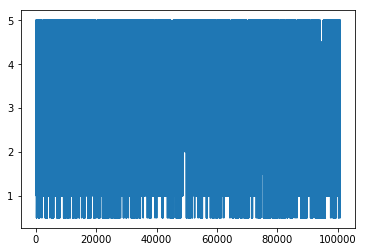

In [8]:
notas.nota.plot()

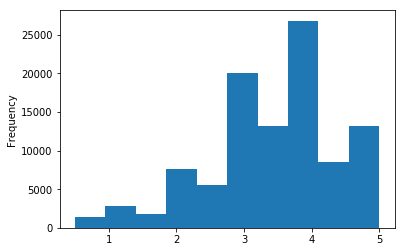

In [9]:
notas.nota.plot(kind='hist')

In [10]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

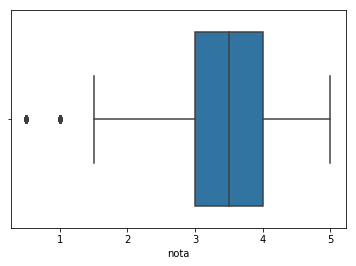

In [11]:
sns.boxplot(notas.nota)

# Parte 2 / 6

In [12]:
filmes = pd.read_csv('01_ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [14]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [15]:
medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

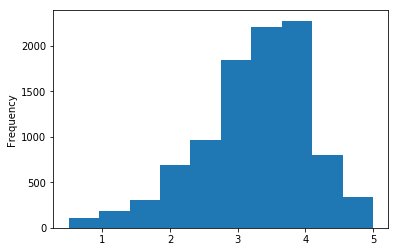

In [16]:
medias_por_filme.plot(kind='hist')

/home/george/miniconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


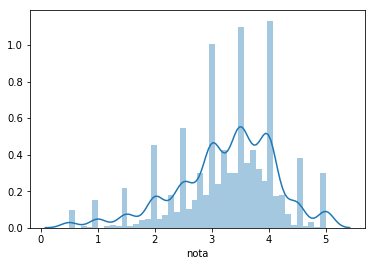

In [17]:
sns. distplot(medias_por_filme)

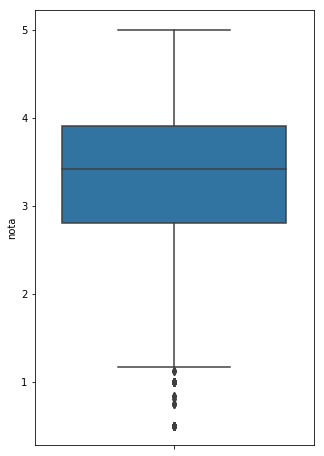

In [18]:
plt.figure(figsize=[5,8])
sns.boxplot(y=medias_por_filme)

# Parte 3 / 6
* Download data from [tmdb movie metadata](https://www.kaggle.com/tmdb/tmdb-movie-metadata)

In [19]:
tmdb = pd.read_csv('03_aula2.1/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [20]:
tmdb.columns

Index([u'budget', u'genres', u'homepage', u'id', u'keywords',
       u'original_language', u'original_title', u'overview', u'popularity',
       u'production_companies', u'production_countries', u'release_date',
       u'revenue', u'runtime', u'spoken_languages', u'status', u'tagline',
       u'title', u'vote_average', u'vote_count'],
      dtype='object')

In [21]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# Parte 4 / 6

In [22]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
cs       2
ro       2
ta       2
ar       2
id       2
el       1
te       1
ky       1
pl       1
xx       1
ps       1
sl       1
hu       1
af       1
vi       1
is       1
no       1
nb       1
tr       1
Name: original_language, dtype: int64

In [23]:
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [24]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


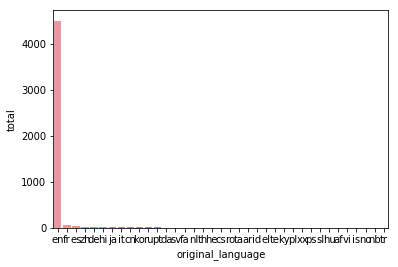

In [25]:
sns.barplot(x=contagem_de_lingua.original_language, y=contagem_de_lingua.total)

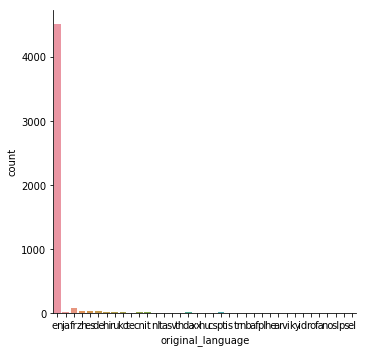

In [26]:
sns.catplot(x='original_language', kind='count', data=tmdb)

In [42]:
print(pd.__version__)

0.23.4


In [38]:
print(sns.__version__)

0.9.0


([<matplotlib.patches.Wedge at 0x7f1cbcb51190>,
 [Text(-1.07917,0.213055,'en'),
  Text(1.03554,-0.371034,'fr'),
  Text(1.05797,-0.301172,'es'),
  Text(1.0688,-0.260129,'zh'),
  Text(1.07732,-0.222224,'de'),
  Text(1.08352,-0.189714,'hi'),
  Text(1.08758,-0.164861,'ja'),
  Text(1.0906,-0.14349,'it'),
  Text(1.09288,-0.124923,'cn'),
  Text(1.09464,-0.108468,'ko'),
  Text(1.09609,-0.0927053,'ru'),
  Text(1.09721,-0.078359,'pt'),
  Text(1.09797,-0.0668722,'da'),
  Text(1.09846,-0.0582522,'sv'),
  Text(1.09878,-0.0517848,'fa'),
  Text(1.09904,-0.0460345,'nl'),
  Text(1.09924,-0.041002,'th'),
  Text(1.09939,-0.0366877,'he'),
  Text(1.0995,-0.033092,'cs'),
  Text(1.09958,-0.0302152,'ro'),
  Text(1.09966,-0.0273382,'ta'),
  Text(1.09973,-0.024461,'ar'),
  Text(1.09979,-0.0215836,'id'),
  Text(1.09983,-0.0194255,'el'),
  Text(1.09985,-0.0179867,'te'),
  Text(1.09988,-0.0165479,'ky'),
  Text(1.0999,-0.015109,'pl'),
  Text(1.09992,-0.0136702,'xx'),
  Text(1.09993,-0.0122313,'ps'),
  Text(1.09995,

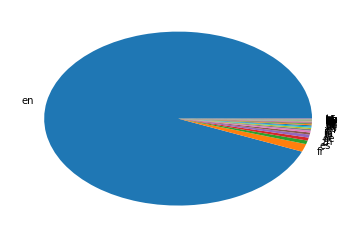

In [28]:
plt.pie(contagem_de_lingua['total'], labels=contagem_de_lingua['original_language'])

In [32]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles)
print(total_do_resto)

4505
298


In [35]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


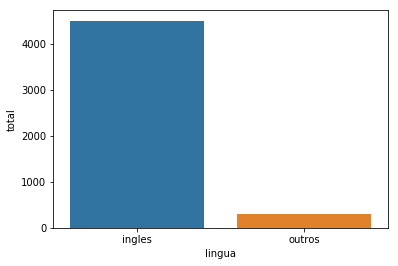

In [37]:
sns.barplot(data=dados, x='lingua', y='total')

([<matplotlib.patches.Wedge at 0x7f1cbcc0da50>,
 [Text(-1.07917,0.213055,'ingles'), Text(1.07917,-0.213056,'outros')])

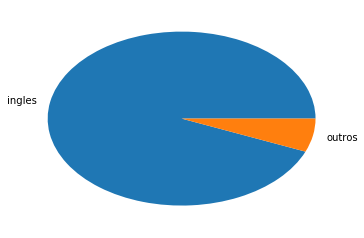

In [38]:
plt.pie(dados['total'], labels=dados['lingua'])

In [43]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language!='en'")
total_por_lingua_de_outros_filmes = tmdb.query("original_language!='en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
th     3
he     3
cs     2
ta     2
ro     2
id     2
ar     2
is     1
el     1
te     1
ky     1
af     1
vi     1
pl     1
no     1
sl     1
ps     1
hu     1
tr     1
xx     1
nb     1
Name: original_language, dtype: int64

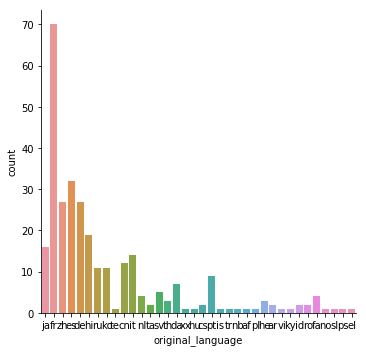

In [44]:
sns.catplot(x='original_language', kind='count', data=filmes_sem_lingua_original_em_ingles)

# Part 5 / 6